In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys, os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='Blues')
from slmsuite.holography.algorithms import Hologram
from slmsuite.hardware.slms.slm import SLM
from slmsuite.hardware.cameras.camera import Camera
from slmsuite.hardware.cameraslms import FourierSLM
from slmsuite.holography.algorithms import SpotHologram
import copy
from IPython.display import Image
import imageio
import cv2
import numpy as np
import ctypes
from ctypes import *
from scipy import misc
from time import sleep
import csv
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from instrumental.drivers.cameras import uc480

def plot(title=""):
    _, axs = plt.subplots(1, 3, figsize=(16,4))

    if slm.phase_correction is None:
        correction = 0 * slm.phase
    else:
        correction = np.mod(slm.phase_correction, 2*np.pi)

    axs[0].set_title("Phase Correction")
    axs[0].imshow(
        correction,
        vmin=0,
        vmax=2*np.pi,
        interpolation="none",
        cmap="twilight"
    )

    axs[1].set_title("Displayed Phase")
    axs[1].imshow(
        np.mod(slm.phase, 2*np.pi),
        vmin=0,
        vmax=2*np.pi,
        interpolation="none",
        cmap="twilight"
    )

    axs[2].set_title("Camera Result")
    axs[2].imshow(cam.get_image())

    plt.suptitle(title)

    plt.show()

cupy not installed. Using numpy.


In [2]:
from slmsuite.hardware.slms.meadowlark import Meadowlark
slm = Meadowlark(sdk_path="C:\\Program Files\\Meadowlark Optics\\Blink 1920 HDMI", lut_path="C:\\Program Files\\Meadowlark Optics\\Blink 1920 HDMI\\LUT Files\\19x12_8bit_linearVoltage.lut")

Validating DPI awareness...success
Constructing Blink SDK...success
Loading LUT file...

In [3]:
from slmsuite.hardware.cameras.thorlabs import ThorCam
ThorCam.info(verbose=True)

ThorCam serials:
"19001"


['19001']

In [4]:
cam = ThorCam()

TLCameraSDK initializing... success
Looking for cameras... success
ThorCam sn "19001" initializing... success


In [5]:
fs = FourierSLM(cam, slm)


100%|██████████| 50/50 [00:55<00:00,  1.10s/it]


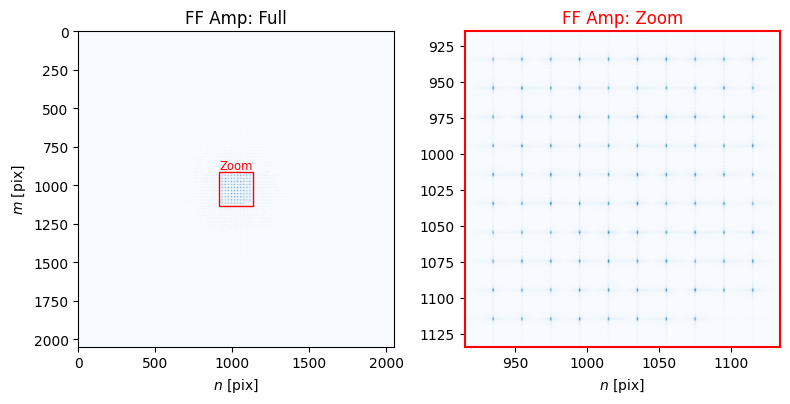

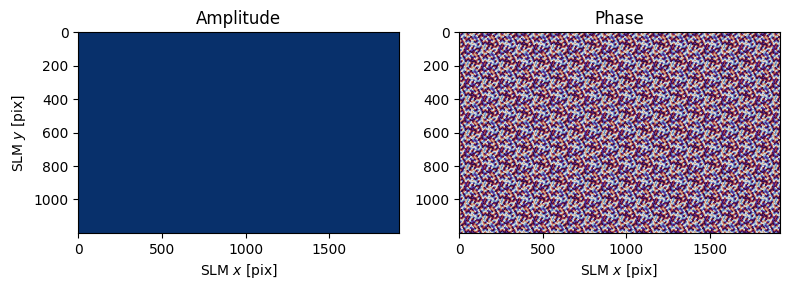

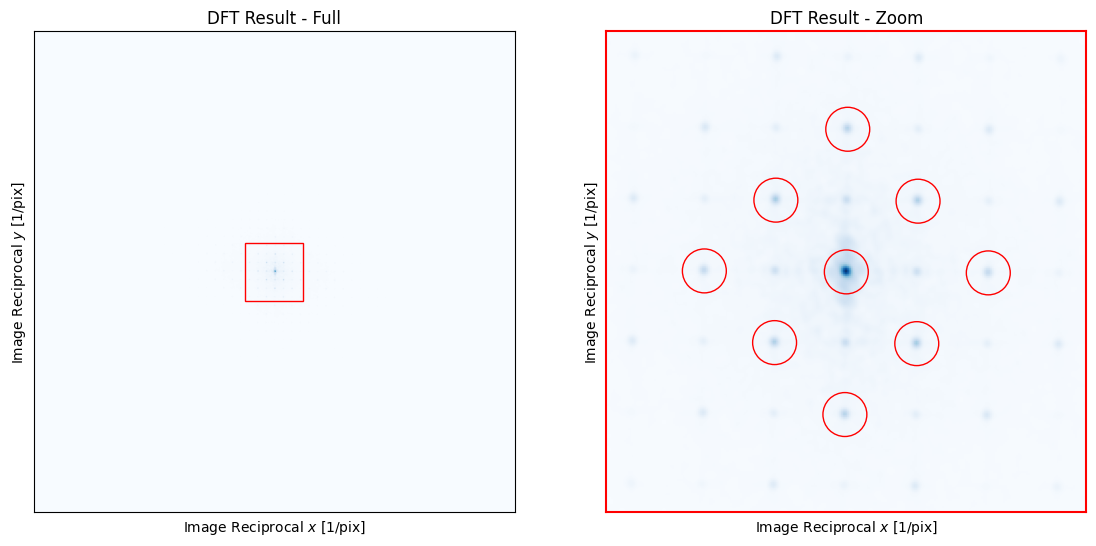

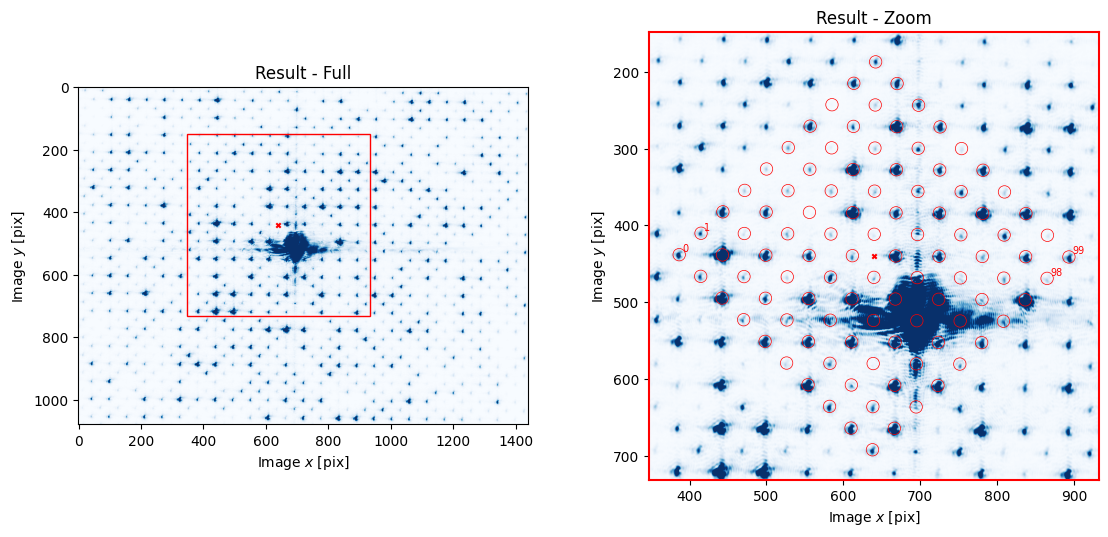

{'M': array([[ 23266.50674392,  22896.33299113],
        [-22837.04043023,  23108.30416451]]),
 'b': array([[640.01001208],
        [439.49313485]]),
 'a': array([[0.],
        [0.]])}

: 

In [14]:
## Now create the wavefront calibration file
# Step 1: Calibrate the Camera Fourier domain
cam.set_exposure(.007)

fs.fourier_calibrate(
    array_shape=[10, 10],           # Size of the calibration grid (Nx, Ny) [knm]
    array_pitch=[20, 20],           # Pitch of the calibration grid (x, y) [knm]
    plot=True,
)

In [7]:
# Step 2: Test a single superpixel
cam.set_exposure(.01)

movie = fs.wavefront_calibrate(
    interference_point=(900, 400),
    field_point=(.25, 0),
    field_point_units="freq",
    superpixel_size=50,
    test_superpixel=(16, 16),           # Testing mode
    plot=3                              # Special mode to generate a phase .gif
)

# Generate a phase .gif
imageio.mimsave('wavefront.gif', movie)
Image(filename="wavefront.gif")

AssertionError: 

In [ ]:
fs.wavefront_calibrate(
    interference_point=(1000, 700),
    field_point=(.25, 0),
    field_point_units="freq",
    superpixel_size=50,
    autoexposure=False
)

fs.save_wavefront_calibration()


In [ ]:
fs.process_wavefront_calibration(r2_threshold=.9, smooth=True, plot=True)


In [ ]:

fs.load_wavefront_calibration(plot=True);  